# Grid Search MLP 2

Explorando busca em grade para encontrar melhor arquitetura com duas camadas ocultas.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

## Carregando dados

In [2]:
# Carregando DataFrame
chainDF = pd.read_csv('./corrente.csv')

targetS = chainDF.pop('classe')

# Carregando Rótulos das características
feature_names = chainDF.columns

# Carregando rótulos das classes
target_names = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

# Definindo variáveis
X, y = chainDF.to_numpy(), targetS.to_numpy()

# Declarando intervalo dos valores de camada oculta
two_layer_sizes = np.array([(layer1, layer2) for layer1 in np.arange(25, 175, 50) for layer2 in np.arange(25, 175, 50)])

# Declarando array com sementes para reprodutibilidade da distribuição
seed_array2 = np.random.randint(0, 9000, 10)

print(f'seeds: {seed_array2};\nhidden_layer_sizes:\n{two_layer_sizes};')

In [4]:

# Declarando lista com arrays de acurácia para cada camada
two_layer_acc = []

for hidden_layer in two_layer_sizes:
    # Declarando lista para armazenar acurácias de cada rodada
    acc = []

    # Rodadas de classificação
    for seed in seed_array2:
        # Distribuindo os dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Instanciando Standard Scaler
        sc = StandardScaler().fit(X_pre_train)

        # Pré-processando dados
        X_train = sc.transform(X_pre_train)
        X_test = sc.transform(X_pre_test)

        # Instanciando e treinando classificador
        classifier = MLPClassifier(
            hidden_layer_sizes=hidden_layer,
            solver='adam',
            activation='tanh'
        ).fit(
            X_train,
            y_train
        )

        # Gerando resultados e adicionando à lista
        acc.append(classifier.score(X_test, y_test))
    
    two_layer_acc.append(acc)

twoLayerDF = pd.DataFrame(
    data=np.array(two_layer_acc),
    index=np.array([f'hls:{hidden_layer}' for hidden_layer in two_layer_sizes])
).transpose()

twoLayerDF

seeds: [8231 5921 6233 8745 3655 7220 3600  513 8350 1568];
hidden_layer_sizes:
[[ 25  25]
 [ 25  75]
 [ 25 125]
 [ 75  25]
 [ 75  75]
 [ 75 125]
 [125  25]
 [125  75]
 [125 125]];


,hls:[25 25],hls:[25 75],hls:[ 25 125],hls:[75 25],hls:[75 75],hls:[ 75 125],hls:[125 25],hls:[125 75],hls:[125 125]
0,0.659275,0.708742,0.714712,0.740725,0.771855,0.781237,0.751812,0.802985,0.799147
1,0.641365,0.689552,0.694670,0.695096,0.755650,0.762473,0.755650,0.772281,0.790618
2,0.655437,0.708742,0.687846,0.742857,0.774414,0.791045,0.747974,0.775267,0.794883
3,0.655864,0.673774,0.706183,0.713859,0.741151,0.757356,0.736887,0.778678,0.787633
4,0.655864,0.670362,0.664819,0.721109,0.739019,0.749680,0.738166,0.779957,0.779957
5,0.647761,0.674627,0.693817,0.714286,0.740299,0.763753,0.738166,0.770149,0.762047
6,0.658422,0.700640,0.706610,0.742857,0.769723,0.778252,0.741578,0.777399,0.782090
7,0.646908,0.677612,0.690832,0.706183,0.746695,0.749254,0.739019,0.777399,0.773134
8,0.660554,0.669083,0.698081,0.715565,0.746695,0.766738,0.733475,0.784222,0.770149
9,0.671642,0.690405,0.699360,0.746695,0.749254,0.772281,0.745842,0.769296,0.779104


,hls:[25 25],hls:[25 75],hls:[ 25 125],hls:[75 25],hls:[75 75],hls:[ 75 125],hls:[125 25],hls:[125 75],hls:[125 125]
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.655309,0.686354,0.695693,0.723923,0.753475,0.767207,0.742857,0.778763,0.781876
std,0.008448,0.015490,0.013553,0.018060,0.013700,0.013638,0.007172,0.009659,0.011526
min,0.641365,0.669083,0.664819,0.695096,0.739019,0.749254,0.733475,0.769296,0.762047
25%,0.649680,0.673987,0.691578,0.713966,0.742537,0.758635,0.738166,0.773028,0.774627
50%,0.655864,0.683582,0.696375,0.718337,0.747974,0.765245,0.740299,0.777399,0.781023
75%,0.659062,0.698081,0.704478,0.742324,0.766205,0.776759,0.747441,0.779638,0.789872
max,0.671642,0.708742,0.714712,0.746695,0.774414,0.791045,0.755650,0.802985,0.799147


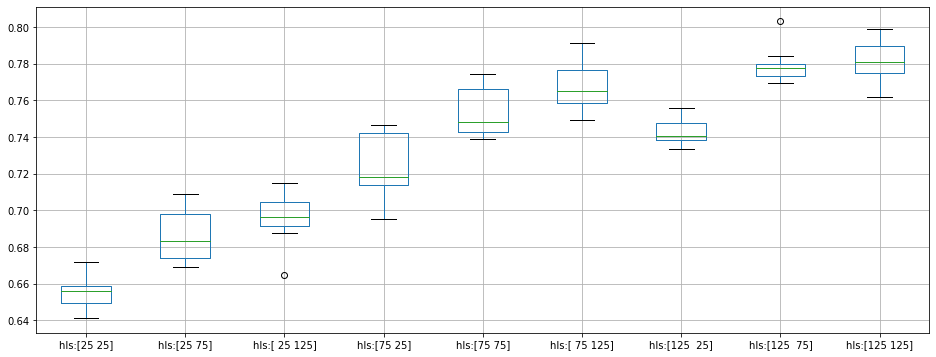

In [6]:
twoLayerDF.boxplot(figsize=(16, 6))
twoLayerDF.describe()